# Moving to Silicon Valley? Explore the Area by Data Science Methods

#### By Forough Mahmoudabadi
This notebook was used for IBM Applied Data Science Capstone Project.

## Part 2 - Demographics, Education, Economics, and School rating in Santa Clara County

### Libraries

Here is the list of required libraries for our data analysis.

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import json # library to handle JSON files
import folium

import seaborn as sns
from scipy import stats

# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.0


## Population Size and Population Density

We obtain data on population size and poulation density from "Open Data Network". We then transform the data to a panda dataframe as follow.

In [2]:
df_PopDensity = pd.read_csv('Capstone Project/Demographic_Statistics_Cities_Part2.csv')
df_PopDensity = df_PopDensity.iloc[:,1:4]
df_PopDensity

NAME Population Population Density
0          Milpitas      77457               5699
1            Gilroy      55525               3439
2       Morgan Hill      43876               3406
3      Monte Sereno       3492               2162
4          Saratoga      30886               2494
5          Campbell      42470               7325
6         Cupertino      60614               5385
7   Los Altos Hills       8517               968 
8         Los Altos      30588               4716
9       Santa Clara     126209               6856
10        Sunnyvale     152323              6928 
11    Mountain View      80993               6752
12        Palo Alto      67019               2806
13        Los Gatos      30922               2791
14         San Jose    1026658               5816

In [3]:
df_PopDensity[['Population','Population Density']] = df_PopDensity[['Population','Population Density']].astype("int")

Now, we can visualize the population size and population density of cities in Santa Clara County.

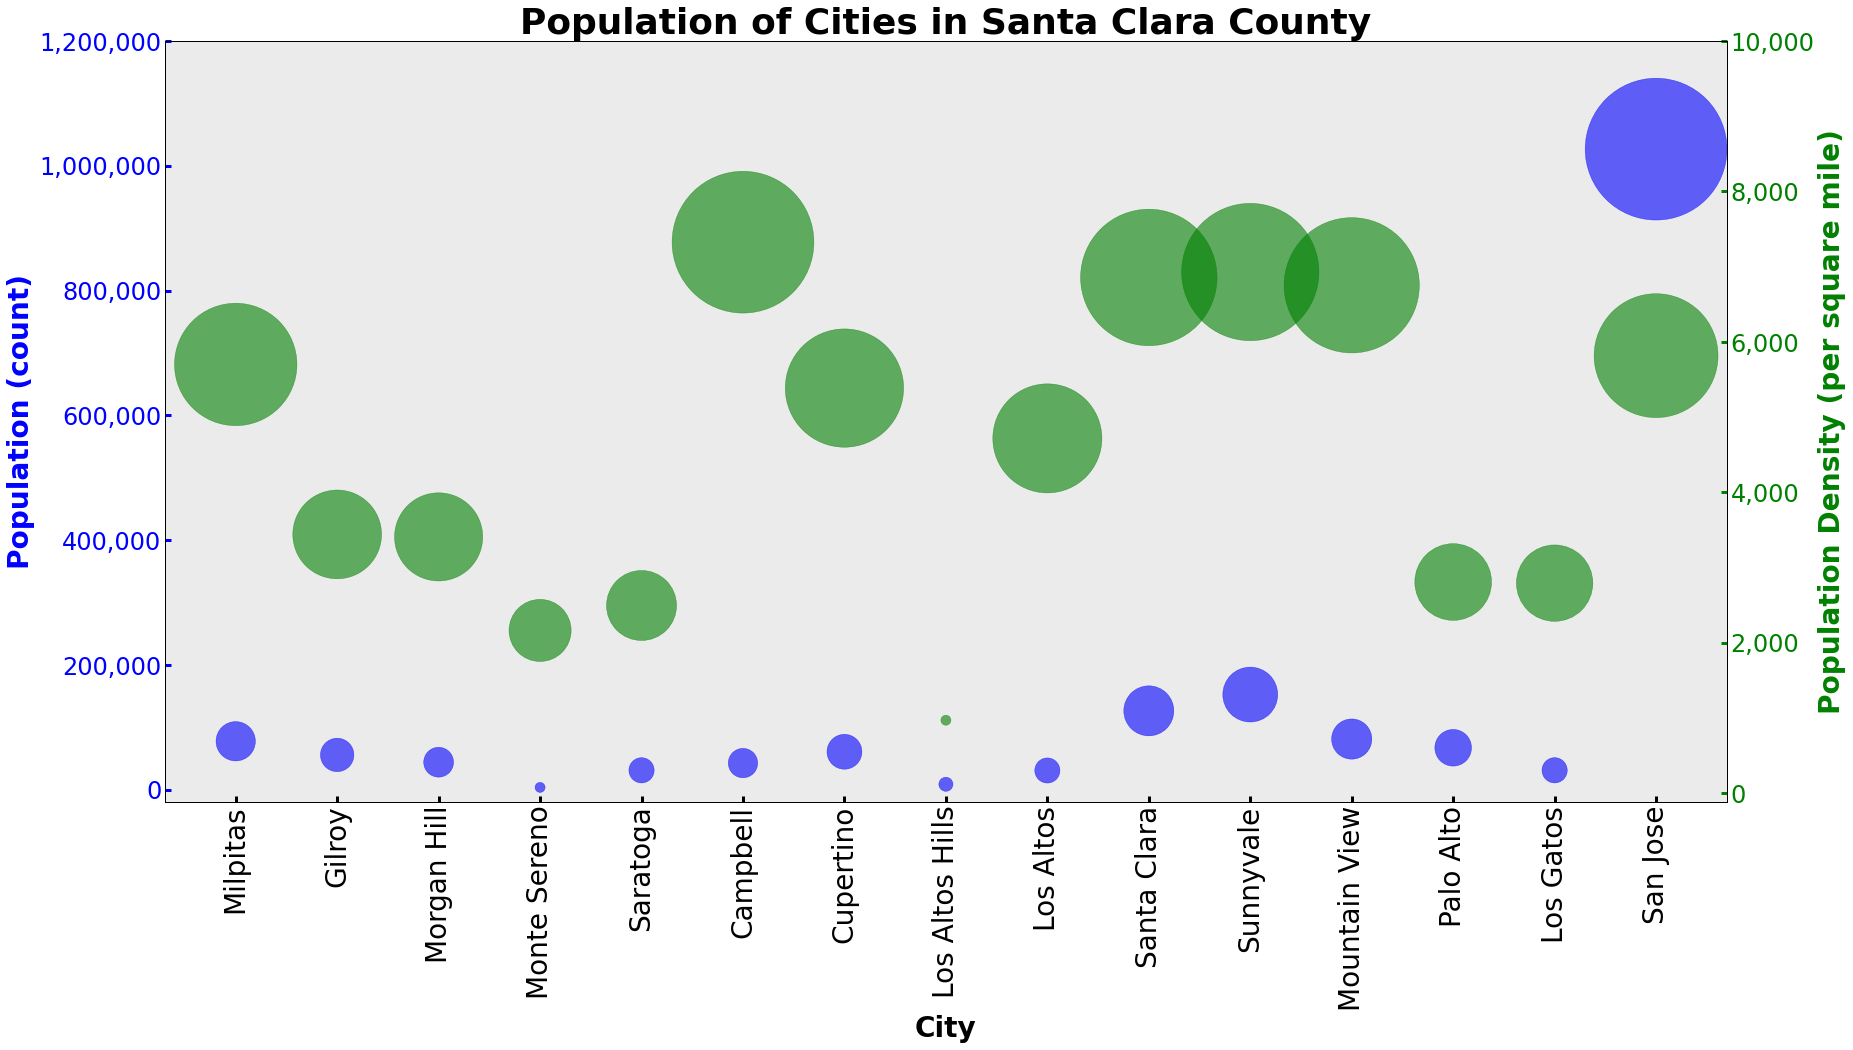

In [4]:
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(28, 14),facecolor='w', edgecolor='k')
    ax1 = fig.add_subplot(1, 1, 1)
    ax2 = ax1.twinx()

norm_pop = (df_PopDensity['Population'] - df_PopDensity['Population'].min()) / (df_PopDensity['Population'].max() - df_PopDensity['Population'].min())
norm_popDensity = (df_PopDensity['Population Density'] - df_PopDensity['Population Density'].min()) / (df_PopDensity['Population Density'].max() - df_PopDensity['Population Density'].min())

ax1.scatter(
                    df_PopDensity['NAME'],
                    df_PopDensity['Population'],
                    alpha=0.6,                  # transparency
                    color='blue',
                    s=norm_pop * 20000 + 100,  # pass in weights 
                   )
ax1.set_ylabel('Population (count)',fontsize=28,fontweight ='bold',color='blue')
ax1.set_xlabel('City', fontsize=28, fontweight ='bold',color='black')
ax1.set_title('Population of Cities in Santa Clara County',fontsize=36,fontweight ='bold')
ax1.set_ylim(-20000, 1200000)
ax1.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax2.scatter(
                    df_PopDensity['NAME'],
                    df_PopDensity['Population Density'],
                    alpha=0.6,                  # transparency
                    color='green',
                    s=norm_popDensity * 20000 + 100,  # pass in weights 
                   )
ax2.set_ylabel('Population Density (per square mile)',fontsize=28,fontweight ='bold',color='green')
ax2.set_ylim(-120, 10000)
ax2.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

ax1.tick_params(axis='x', labelrotation=90, labelsize =28 ,width=3, length=6, direction='in')
ax1.tick_params(axis='y', colors='blue', labelsize =24 ,width=3, length=6, direction='in')
ax2.tick_params(axis='y', colors='green', labelsize = 24,width=3, length=6, direction='in')

mpl.rcParams['axes.linewidth'] = 2
ax1.set_facecolor("#EBEBEB")
ax1.axis('on')
ax2.axis('on')
ax1.grid(False)
ax2.grid(False)
plt.show()
fig.savefig('Capstone Project/population.png', dpi=fig.dpi, bbox_inches='tight')

## Analysis of Ethnic/Racial Diversity 

We obtain the dataset regarding the ethnicity/race statistics from "Santa Clara County Public Health Department". The csv file then is read to a panda dataframe as below.

In [5]:
df_D = pd.read_csv('Capstone Project/Demographic_Statistics_Cities_Part1.csv')

In [6]:
df_D.head()

OBJECTID          NAME  Population  African American  \
0         1      Milpitas       66790                 3   
1         2        Gilroy       48821                 2   
2         3   Morgan Hill       37882                 2   
3         4  Monte Sereno        3341                 0   
4         5      Saratoga       29926                 0   

   Asian/Pacific Islander  Latino  White  Other  Foreign-born  Other Language  \
0                      62      17     15      3            51              65   
1                       7      58     31      2            25              47   
2                      10      34     50      4            19              30   
3                      14       5     77      4            13              13   
4                      41       4     52      3            38              44   

   Hosehold Size (Ave)  
0                 3.38  
1                 3.34  
2                 3.04  
3                 2.84  
4                 2.76

We remove the unrelated columns. We also set the index to column "NAME".

In [7]:
df_Ethnic = df_D.iloc[:,1:8].drop('Population',1)
df_Ethnic.set_index('NAME', inplace=True)
df_Ethnic

African American  Asian/Pacific Islander  Latino  White  \
NAME                                                                       
Milpitas                        3                      62      17     15   
Gilroy                          2                       7      58     31   
Morgan Hill                     2                      10      34     50   
Monte Sereno                    0                      14       5     77   
Saratoga                        0                      41       4     52   
Campbell                        3                      16      18     58   
Cupertino                       1                      63       4     29   
Los Altos Hills                 1                      27       3     66   
Los Altos                       1                      24       4     68   
Santa Clara                     3                      38      19     36   
Sunnyvale                       2                      41      19     35   
Mountain View                   2                      26      22     46   
Palo Alto                       2                      27       6     61   
Los Gatos                       1                      11       7     77   
San Jose                        3                      32      33     29   

                 Other  
NAME                    
Milpitas             3  
Gilroy               2  
Morgan Hill          4  
Monte Sereno         4  
Saratoga             3  
Campbell             5  
Cupertino            3  
Los Altos Hills      3  
Los Altos            3  
Santa Clara          4  
Sunnyvale            3  
Mountain View        4  
Palo Alto            4  
Los Gatos            4  
San Jose             3

We remove the index name as we don't want it to show up on our stacked bar plot.

In [8]:
df_Ethnic.index.name = None

In [9]:
def plot_stacked_bar(data, series_labels, category_labels=None, 
                     show_values=False, value_format="{}", y_label=None, 
                     colors=None, grid=True, reverse=False):
    """Plots a stacked bar chart with the data and labels provided.

    Keyword arguments:
    data            -- 2-dimensional numpy array or nested list
                       containing data for each series in rows
    series_labels   -- list of series labels (these appear in
                       the legend)
    category_labels -- list of category labels (these appear
                       on the x-axis)
    show_values     -- If True then numeric value labels will 
                       be shown on each bar
    value_format    -- Format string for numeric value labels
                       (default is "{}")
    y_label         -- Label for y-axis (str)
    colors          -- List of color labels
    grid            -- If True display grid
    reverse         -- If True reverse the order that the
                       series are displayed (left-to-right
                       or right-to-left)
    """

    ny = len(data[0])
    ind = list(range(ny))

    axes = []
    cum_size = np.zeros(ny)

    data = np.array(data)

    if reverse:
        data = np.flip(data, axis=1)
        category_labels = reversed(category_labels)

    for i, row_data in enumerate(data):
        color = colors[i] if colors is not None else None
        axes.append(plt.bar(ind, row_data, bottom=cum_size, 
                            label=series_labels[i], color=color))
        cum_size += row_data

    if category_labels:
        plt.xticks(ind, category_labels)

    if y_label:
        plt.ylabel(y_label)

    plt.legend()

    if grid:
        plt.grid()

    if show_values:
        for axis in axes:
            for bar in axis:
                w, h = bar.get_width(), bar.get_height()
                plt.text(bar.get_x() + w/2, bar.get_y() + h/2, 
                         value_format.format(h), ha="center", 
                         va="center")

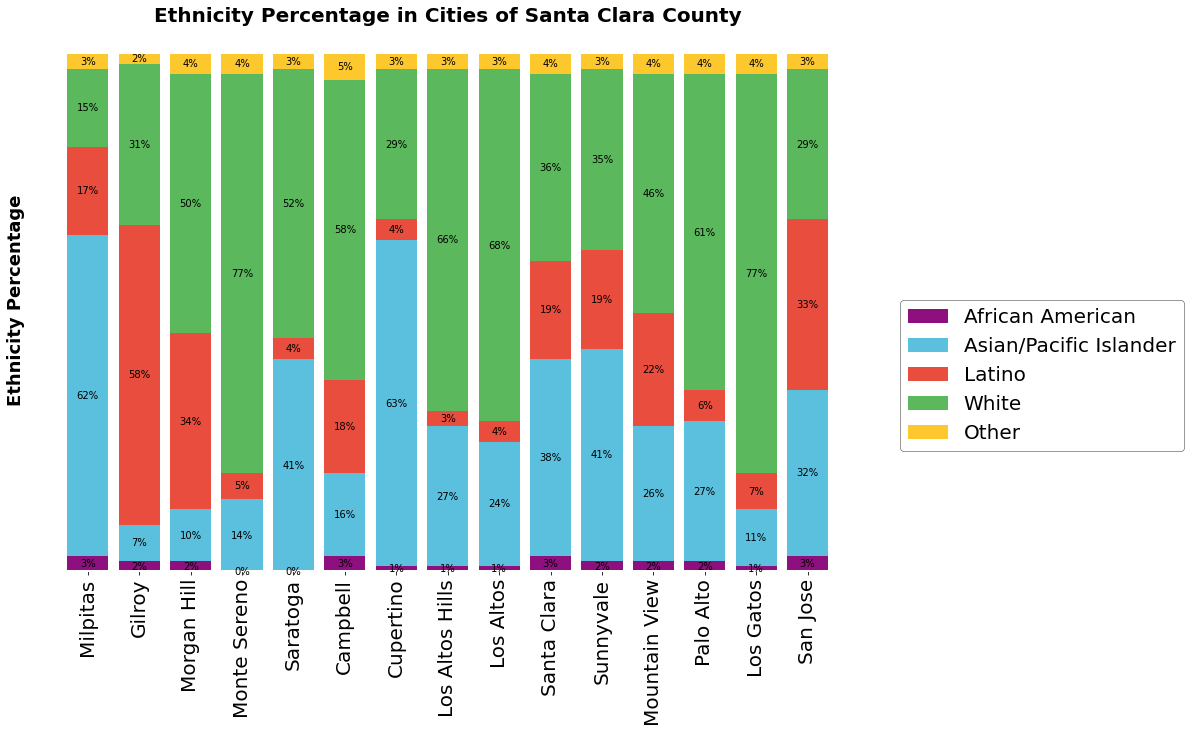

In [10]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
colors_list = ['#8E0F7E','#5bc0de','#E84D3D','#5cb85c','#FDC72E']
fig = plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
series_labels = ['African American', 'Asian', 'Latino', 'White', 'Other']

data = [
    [number / 100 for number in df_Ethnic['African American']],
    [number / 100 for number in df_Ethnic['Asian/Pacific Islander']],
    [number / 100 for number in df_Ethnic['Latino']],
    [number / 100 for number in df_Ethnic['White']],
    [number / 100 for number in df_Ethnic['Other']]
]

category_labels = df_Ethnic.index.values.tolist()
plot_stacked_bar(
    data, 
    series_labels, 
    category_labels=category_labels,
    show_values=True, 
    value_format="{:.0%}",
    colors = colors_list, 
    y_label="Ethnicity Percentage"
)

plt.yticks([])
plt.xticks(fontsize=20, rotation='vertical')
plt.legend(bbox_to_anchor=(1.04,0.5), loc="best", borderaxespad=0, labels=df_Ethnic.columns, fontsize= 20, facecolor='white', edgecolor='k')
plt.title("Ethnicity Percentage in Cities of Santa Clara County",fontsize=20,fontweight="bold")
label_y = plt.ylabel("Ethnicity Percentage",fontsize=18,fontweight="bold")
label_y.set_color("black")
[i.set_color("black") for i in plt.gca().get_xticklabels()]
plt.box(True)
plt.rcParams["font.weight"] = "bold"
fig.savefig('Capstone Project/ethnicity.png', dpi=fig.dpi, bbox_inches='tight')
plt.show()

## Education Analysis

We obtained the list of cities in Santa Clara County along with their coordinates in Part 1. Let's read the data into a dataframe called county_df.

In [11]:
county_df = pd.read_csv('Capstone Project/Cities_GeoData.csv')
county_df

City   Latitude   Longitude
0          MILPITAS  37.428272 -121.906624
1            GILROY  37.006508 -121.563172
2       MORGAN HILL  37.130408 -121.654497
3      MONTE SERENO  37.236333 -121.992458
4          SARATOGA  37.263832 -122.023015
5          CAMPBELL  37.287063 -121.944882
6         CUPERTINO  37.322893 -122.032290
7     MOUNTAIN VIEW  37.389389 -122.083210
8          SAN JOSE  37.336191 -121.890583
9   LOS ALTOS HILLS  37.379663 -122.137464
10        LOS ALTOS  37.379063 -122.116578
11      SANTA CLARA  37.354113 -121.955174
12        SUNNYVALE  37.368830 -122.036350
13        PALO ALTO  37.444329 -122.159847
14        LOS GATOS  37.226611 -121.974680

We obtain the dataset regarding the education statistics in Santa Clara County from "Santa Clara County Public Health Department". The csv file then is read to a panda dataframe called df_E.

In [12]:
df_E = pd.read_csv('Capstone Project/Economics_Education_Statistics_Cities.csv')
df_E

OBJECTID             NAME  Household income (Med)  ed_lt_hs  ed_hsgrad  \
0          1         Milpitas                   99447      15.0         18   
1          2           Gilroy                   78842      23.0         19   
2          3      Morgan Hill                   94300      12.0         19   
3          4     Monte Sereno                  231898       NaN          8   
4          5         Saratoga                  157439       2.0          5   
5          6         Campbell                   84692       7.0         17   
6          7        Cupertino                  127534       3.0          6   
7          8  Los Altos Hills                  196484       NaN          3   
8          9        Los Altos                  154821       1.0          5   
9         10      Santa Clara                   92198       8.0         15   
10        11        Sunnyvale                   96884       9.0         12   
11        12    Mountain View                   92987       7.0         11   
12        13        Palo Alto                  122482       3.0          6   
13        14        Los Gatos                  121933       2.0          7   
14        15         San Jose                   81349      17.0         18   

    ed_partcoll  ed_collgrad  ed_hs  
0            26           41     33  
1            32           26     42  
2            32           38     31  
3            19           72      8  
4            15           78      7  
5            29           47     24  
6            15           76      9  
7            12           83      3  
8            15           79      6  
9            23           54     23  
10           20           59     21  
11           18           64     18  
12           11           80      9  
13           22           68      9  
14           26           38     35

In [13]:
df_Education = df_E.iloc[:,1:].drop('Household income (Med)',1)
df_Education

NAME  ed_lt_hs  ed_hsgrad  ed_partcoll  ed_collgrad  ed_hs
0          Milpitas      15.0         18           26           41     33
1            Gilroy      23.0         19           32           26     42
2       Morgan Hill      12.0         19           32           38     31
3      Monte Sereno       NaN          8           19           72      8
4          Saratoga       2.0          5           15           78      7
5          Campbell       7.0         17           29           47     24
6         Cupertino       3.0          6           15           76      9
7   Los Altos Hills       NaN          3           12           83      3
8         Los Altos       1.0          5           15           79      6
9       Santa Clara       8.0         15           23           54     23
10        Sunnyvale       9.0         12           20           59     21
11    Mountain View       7.0         11           18           64     18
12        Palo Alto       3.0          6           11           80      9
13        Los Gatos       2.0          7           22           68      9
14         San Jose      17.0         18           26           38     35

We change the columns names as follow.

In [14]:
df_Education.rename(columns={'ed_lt_hs':'Less than high school','ed_hsgrad':'High school graduate','ed_partcoll':'Some college or associates degree','ed_collgrad':'College graduate or higher','ed_hs':'High school graduate or less'},inplace=True)

Let's remove the index column and set the column "NAME" as the new index.

In [15]:
df_Education.reset_index(drop=True, inplace=True)
df_Education.set_index('NAME', inplace=True)
df_Education

Less than high school  High school graduate  \
NAME                                                           
Milpitas                          15.0                    18   
Gilroy                            23.0                    19   
Morgan Hill                       12.0                    19   
Monte Sereno                       NaN                     8   
Saratoga                           2.0                     5   
Campbell                           7.0                    17   
Cupertino                          3.0                     6   
Los Altos Hills                    NaN                     3   
Los Altos                          1.0                     5   
Santa Clara                        8.0                    15   
Sunnyvale                          9.0                    12   
Mountain View                      7.0                    11   
Palo Alto                          3.0                     6   
Los Gatos                          2.0                     7   
San Jose                          17.0                    18   

                 Some college or associates degree  \
NAME                                                 
Milpitas                                        26   
Gilroy                                          32   
Morgan Hill                                     32   
Monte Sereno                                    19   
Saratoga                                        15   
Campbell                                        29   
Cupertino                                       15   
Los Altos Hills                                 12   
Los Altos                                       15   
Santa Clara                                     23   
Sunnyvale                                       20   
Mountain View                                   18   
Palo Alto                                       11   
Los Gatos                                       22   
San Jose                                        26   

                 College graduate or higher  High school graduate or less  
NAME                                                                       
Milpitas                                 41                            33  
Gilroy                                   26                            42  
Morgan Hill                              38                            31  
Monte Sereno                             72                             8  
Saratoga                                 78                             7  
Campbell                                 47                            24  
Cupertino                                76                             9  
Los Altos Hills                          83                             3  
Los Altos                                79                             6  
Santa Clara                              54                            23  
Sunnyvale                                59                            21  
Mountain View                            64                            18  
Palo Alto                                80                             9  
Los Gatos                                68                             9  
San Jose                                 38                            35

We remove the index name so it doesn't show up in our bar plot.

In [16]:
df_Education.index.name = None

Now, we can visualize the education attainment in different cities of Santa Clara County.

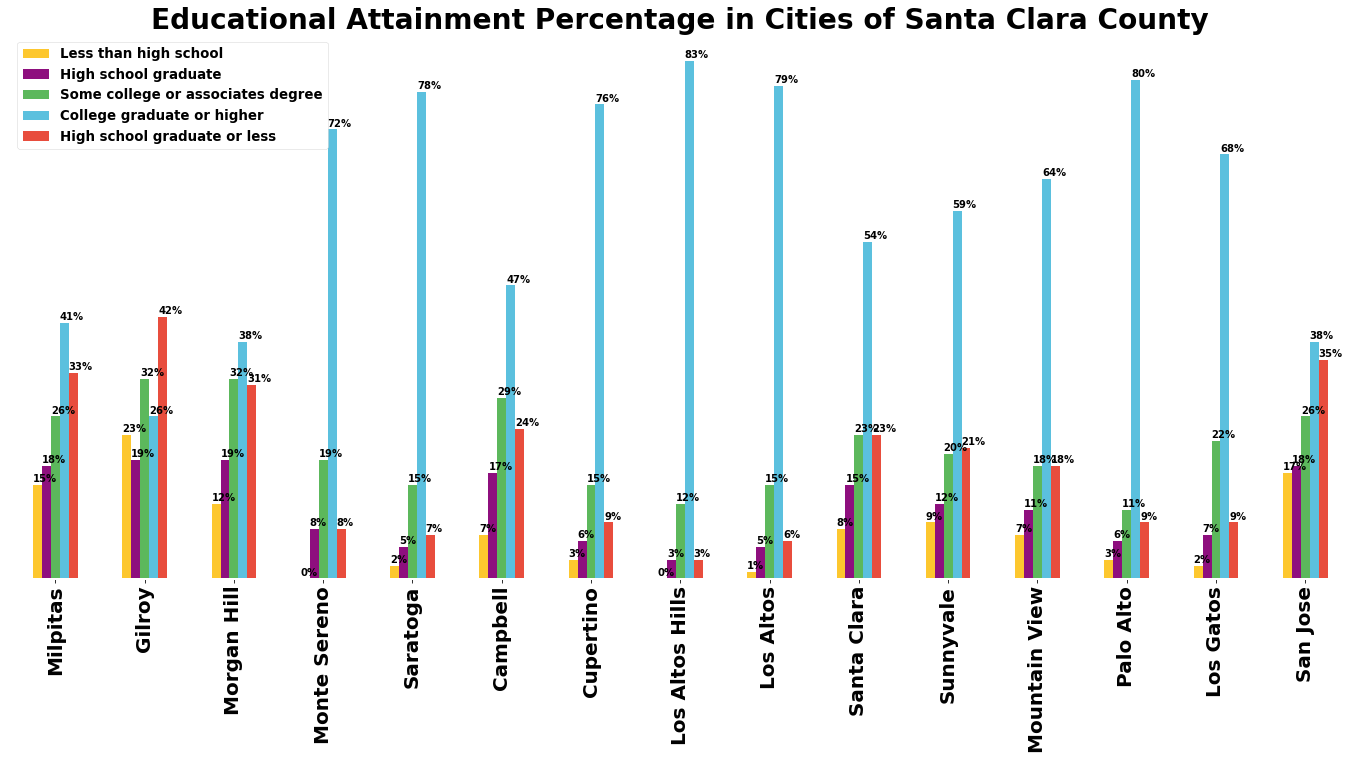

In [17]:
colors_list = ['#FDC72E','#8E0F7E','#5cb85c','#5bc0de','#E84D3D']
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df_Education.plot(kind='bar',figsize=(24,10),color = colors_list,edgecolor=None,ax=ax)
plt.rcParams["font.weight"] = "bold"
plt.yticks([])
plt.xticks(fontsize=14)

plt.legend(labels=df_Education.columns,fontsize= 13.3,facecolor='white',loc='upper left',fancybox=True)
ax.set_xticklabels(df_Education.index,fontsize=20)
ax.set_facecolor('xkcd:white')
ax.set_title("Educational Attainment Percentage in Cities of Santa Clara County",fontsize=28,fontweight="bold")
[i.set_color("black") for i in plt.gca().get_xticklabels()]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0%}'.format(height/100), (x, y + height + 0.5))
plt.rcParams["font.weight"] = "bold"
fig.savefig('Capstone Project/Education.png', dpi=fig.dpi, bbox_inches='tight')

## Economics

We make a new data frame that contains the list of cities in Santa Clara County as well as latitude and longitude coordinates information.

In [18]:
cities_df = county_df.drop(county_df.index[[3,4]]).reset_index(drop=True)
cities_df

City   Latitude   Longitude
0          MILPITAS  37.428272 -121.906624
1            GILROY  37.006508 -121.563172
2       MORGAN HILL  37.130408 -121.654497
3          CAMPBELL  37.287063 -121.944882
4         CUPERTINO  37.322893 -122.032290
5     MOUNTAIN VIEW  37.389389 -122.083210
6          SAN JOSE  37.336191 -121.890583
7   LOS ALTOS HILLS  37.379663 -122.137464
8         LOS ALTOS  37.379063 -122.116578
9       SANTA CLARA  37.354113 -121.955174
10        SUNNYVALE  37.368830 -122.036350
11        PALO ALTO  37.444329 -122.159847
12        LOS GATOS  37.226611 -121.974680

We obtain the data on average rent in Santa Clara County for the year 2020 from "rentcafe.com". The data is then transformed into a panda dataframe called df_rent.

In [19]:
df_rent = pd.read_csv('Capstone Project/AverageRentSantaClaraCounty.csv')
df_rent

City  Average Rent
0            Gilroy          2215
1       Morgan Hill          2390
2          Campbell          2633
3          San Jose          2790
4          Milpitas          2853
5         Sunnyvale          3016
6         Los Gatos          3054
7   Los Altos Hills          3060
8         Los Altos          3060
9     Mountain View          3291
10        Palo Alto          3347
11        Cupertino          3492
12      Santa Clara          2974

We will merge "df_rent" and "cities_df" dataframes. First, we process the data frames so that the column "City" in both data frames matches each other. Then, we merge the data frames on the matched column.

In [20]:
df_rent = df_rent.sort_values(by=df_rent.columns[0]).reset_index(drop=True)
cities_df = cities_df.sort_values(by=cities_df.columns[0]).reset_index(drop=True)
df_rent['City'] = df_rent['City'].str.upper()

In [21]:
df_geo_rent = pd.merge(cities_df, df_rent, on='City', how='outer' )
df_geo_rent

City   Latitude   Longitude  Average Rent
0          CAMPBELL  37.287063 -121.944882          2633
1         CUPERTINO  37.322893 -122.032290          3492
2            GILROY  37.006508 -121.563172          2215
3         LOS ALTOS  37.379063 -122.116578          3060
4   LOS ALTOS HILLS  37.379663 -122.137464          3060
5         LOS GATOS  37.226611 -121.974680          3054
6          MILPITAS  37.428272 -121.906624          2853
7       MORGAN HILL  37.130408 -121.654497          2390
8     MOUNTAIN VIEW  37.389389 -122.083210          3291
9         PALO ALTO  37.444329 -122.159847          3347
10         SAN JOSE  37.336191 -121.890583          2790
11      SANTA CLARA  37.354113 -121.955174          2974
12        SUNNYVALE  37.368830 -122.036350          3016

We load the geo data of Santa Clara County.

In [22]:
with open('Capstone Project/SantaClaraCounty.json') as json_santaclara:
    santaclara_data = json.load(json_santaclara)

Now, we can visualize the average rent in different cities of Santa Clara County.

In [23]:
sc_cities1_map = folium.Map(location=[37.3337, -121.8907], zoom_start=12)

sc_cities1_map.choropleth(
    geo_data=santaclara_data,
    data=df_geo_rent,
    columns=['City', 'Average Rent'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Rent in Santa Clara County'
)

for lat, lng, label, rent in zip(df_geo_rent['Latitude'], df_geo_rent['Longitude'], df_geo_rent['City'], df_geo_rent['Average Rent']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup = 'City: {}, Average Rent: {}'.format(label, rent),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sc_cities1_map)
    
# display map
sc_cities1_map

c:\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


##### Note: Data on average rent for city of Saratoga was not available. That is why Saratoga is shown with black color on the map.

We obtain dataset on average house sales prices in Santa Clara County for the year 2020 from "Bay Area Market Reports". Then, we read the csv file into a panda dataframe df_H.

In [24]:
df_H = pd.read_csv('Capstone Project/HouseSalesPrice_SantaClaraCounty.csv')
df_H.head()

City  Median House Sales Price  Median $ per Square Foot
0         Los Altos Hills                   4055000                      1167
1              Los Altos                    3280000                      1312
2               Palo Alto                   3100000                      1632
3                Saratoga                   2663000                      1009
4  Los Gatos/Monte Sereno                   2400000                      1004

Let's visualize the house sales prices using a barchart.

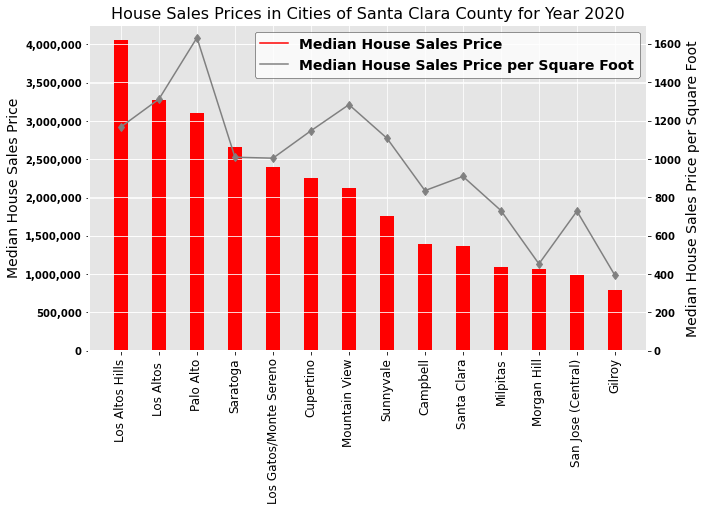

In [25]:
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

fig = plt.figure(figsize=(10, 6),facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

barchart = plt.bar(df_H['City'], df_H['Median House Sales Price'], color='red',width = .35)
plt.xticks(fontsize=12, rotation='vertical',fontweight="normal")
plt.ylabel("Median House Sales Price",fontsize=14,fontweight="normal")

lineplt = plt.twinx()
linechart = plt.plot(df_H['City'], df_H['Median $ per Square Foot'], color='grey',marker='d')

legend1 = mlines.Line2D([], [], color='red', label='Median House Sales Price')
legend2 = mlines.Line2D([], [], color='grey', label='Median House Sales Price per Square Foot')

plt.legend(handles=[legend1, legend2], fontsize= 14, facecolor='white', edgecolor='k')
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plt.title("House Sales Prices in Cities of Santa Clara County for Year 2020",fontsize=16,fontweight="normal")
plt.xlabel("Cities of Santa Clara County",fontsize=14,fontweight="normal")
lineplt.set_ylabel("Median House Sales Price per Square Foot",fontsize=14,fontweight="normal")
lineplt.set_ylim(0, 1700) 

plt.show()

## School Rating

We obtain information on average school rating from "greatschools.com". We import data from the web into excel and then clean it in order to obtain the average school ratings for different cities in Santa Clara County. The result is then transformed into a panda dataframe called df_S.

In [26]:
df_S = pd.read_csv('Capstone Project/Average_School_Rating.csv')

In [27]:
df_Coordinates = pd.read_csv('Capstone Project/Cities_GeoData.csv')
df_Coordinates = df_Coordinates.drop([3])
df_Coordinates = df_Coordinates.reset_index(drop=True)
df_S['City'] = df_S['City'].str.upper()
df_geo_school = pd.merge(df_Coordinates, df_S, on='City', how='outer' )
df_geo_school

City   Latitude   Longitude  Average School Rating
0          MILPITAS  37.428272 -121.906624                    6.5
1            GILROY  37.006508 -121.563172                    5.4
2       MORGAN HILL  37.130408 -121.654497                    4.9
3          SARATOGA  37.263832 -122.023015                    8.6
4          CAMPBELL  37.287063 -121.944882                    6.4
5         CUPERTINO  37.322893 -122.032290                    8.4
6     MOUNTAIN VIEW  37.389389 -122.083210                    7.0
7          SAN JOSE  37.336191 -121.890583                    5.4
8   LOS ALTOS HILLS  37.379663 -122.137464                    9.0
9         LOS ALTOS  37.379063 -122.116578                    8.9
10      SANTA CLARA  37.354113 -121.955174                    6.0
11        SUNNYVALE  37.368830 -122.036350                    6.4
12        PALO ALTO  37.444329 -122.159847                    8.5
13        LOS GATOS  37.226611 -121.974680                    8.1

Now, we can visualize average school rating in Santa Clara County.

In [28]:
sc_cities_map = folium.Map(location=[37.3337, -121.8907], zoom_start=10,tiles="cartodbpositron")

sc_cities_map.choropleth(
    geo_data=santaclara_data,
    data=df_geo_school,
    columns=['City', 'Average School Rating'],
    key_on='feature.properties.name',
#    fill_color='YlOrRd',
#    fill_color='BuPu',
#    fill_color='RdOrBr',
    fill_color='YlGn',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average School Rating in Santa Clara County'
)

for lat, lng, label, rate in zip(df_geo_school['Latitude'], df_geo_school['Longitude'], df_geo_school['City'], df_geo_school['Average School Rating']):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='orange',
        fill=True,
        popup = '{}, Ave Rate: {}'.format(label, rate),
#        fill_color='black',
        fill_opacity=0.6
    ).add_to(sc_cities_map)
    
# display map
sc_cities_map

c:\python\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


##### Note: Data on average school rating for city of Saratoga was not available. That is why Saratoga is shown with black color on the map.

We would like to investigate the correlation between school rating and house sales prices in Santa Clara County. To do that, we merge the dataframes df_H_new and df_S into a new dataframe called df_H_S.

In [29]:
df_H_new = df_H 
df_H_new['City'] = df_H['City'].str.upper()
df_H_new.City[4] = 'LOS GATOS'
df_H_new.City[12] = 'SAN JOSE'
df_H_new.City[1] = 'LOS ALTOS'
df_H_S = pd.merge(df_H_new, df_S, on='City', how='outer' )
df_H_S

<ipython-input-29-b6941dbe3616>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_new.City[4] = 'LOS GATOS'
<ipython-input-29-b6941dbe3616>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_new.City[12] = 'SAN JOSE'
<ipython-input-29-b6941dbe3616>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_H_new.City[1] = 'LOS ALTOS'


City  Median House Sales Price  Median $ per Square Foot  \
0   LOS ALTOS HILLS                   4055000                      1167   
1         LOS ALTOS                   3280000                      1312   
2         PALO ALTO                   3100000                      1632   
3          SARATOGA                   2663000                      1009   
4         LOS GATOS                   2400000                      1004   
5         CUPERTINO                   2250000                      1147   
6     MOUNTAIN VIEW                   2125000                      1283   
7         SUNNYVALE                   1765000                      1108   
8          CAMPBELL                   1400000                       835   
9       SANTA CLARA                   1366000                       909   
10         MILPITAS                   1095000                       731   
11      MORGAN HILL                   1065000                       453   
12         SAN JOSE                    985000                       728   
13           GILROY                    800000                       393   

    Average School Rating  
0                     9.0  
1                     8.9  
2                     8.5  
3                     8.6  
4                     8.1  
5                     8.4  
6                     7.0  
7                     6.4  
8                     6.4  
9                     6.0  
10                    6.5  
11                    4.9  
12                    5.4  
13                    5.4

Now, we are able to visualize the correlation using a regplot.

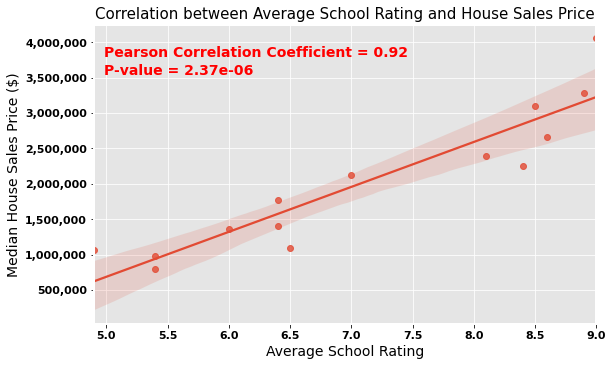

In [30]:
f, ax = plt.subplots(figsize=(9,5.5))
sns.regplot(x="Average School Rating", y="Median House Sales Price", data=df_H_S, ax=ax)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_title('Correlation between Average School Rating and House Sales Price', fontsize = 15, color='black')
ax.set_ylabel('Median House Sales Price ($)', fontsize = 14, color='black')
ax.set_xlabel('Average School Rating', fontsize = 14, color='black')
ax.text(0.02, 0.93, "Pearson Correlation Coefficient = 0.92", ha="left", va="top", transform=ax.transAxes,size=14, color='r')
ax.text(0.02, 0.87, "P-value = 2.37e-06 ", ha="left", va="top", transform=ax.transAxes,size=14, color='r')
ax.tick_params(axis='both', which='major', labelsize=11, color='black')

As we see, there is a significant correlation between "Average School Rating" and "Median House Sales Price".

In [31]:
df_H_S[['Average School Rating', 'Median House Sales Price']].corr()

Average School Rating  Median House Sales Price
Average School Rating                  1.000000                  0.923915
Median House Sales Price               0.923915                  1.000000

Obtaining the Pearson correlation and P-value

In [32]:
pearson_coef, p_value = stats.pearsonr(df_H_S['Average School Rating'], df_H_S['Median House Sales Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.923915234370124  with a P-value of P = 2.3735297313317656e-06


### End of Part 2 ---- Please enter the GitHub URL in https://nbviewer.jupyter.org/ to view visualizations.